In [78]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
import datetime

1. Imported Data from Bank of England Interactive Statistical Database
2. Cleaned and reformatted data
3. Visualised daily exchange rates
3. Visualised daily exchange rate for Brexit window
4. Visualised monthly exchange rates
5. Visualised montly exchange rate for Brexit window
6. Determined monthly exchange rates did not provide sufficiently granularity
7. Resampled daily data to get weekly data
8. Visualised weekly exchange rate for Brexit window
9. Determined weekly data was a good balance between daily and monthly - sufficient scope for collecting news articles
10. Highlighted key timeframes of interest to explore further after sentiment analysis  

### Daily Indicators:

- XUDLERS,Spot exchange rate - Euro into Sterling
- XUDLUSS,Spot exchange rate - USD into Sterling

### Monthly Indicators:

- IUMAAJNB,Monthly average rate of discount - 3 month Treasury bills - Sterling
- IUMAJNB,End month level of discount rate - 3 month Treasury bills - Sterling
- IUMAVNEA,Monthly average Sterling 1 month mean interbank lending rate

- IUMVNEA,End month Sterling 1 month mean interbank lending rate 

- XUMAERS,Monthly average Spot exchange rate - Euro into Sterling
- XUMAUSS,Monthly average Spot exchange rate - US into Sterling
- XUMLERS,End month Spot exchange rate - Euro into Sterling
- XUMLUSS,End month Spot exchange rate - US into Sterling


In [19]:
daily_data = pd.read_csv('daily_rates.csv', skiprows=3, header=0)
monthly_data = pd.read_csv('monthly_rates.csv', skiprows=11, header=0)

In [32]:
daily_data.head()

,DATE,XUDLERS,XUDLUSS
0,04 Jan 2000,1.5874,1.6352
1,05 Jan 2000,1.5862,1.6390
2,06 Jan 2000,1.5921,1.6478
3,07 Jan 2000,1.5909,1.6372
4,10 Jan 2000,1.5956,1.6377


In [ ]:
monthly_data.head()

In [161]:
daily_data['datetime'] = pd.to_datetime(daily_data['DATE'])
monthly_data['datetime'] = pd.to_datetime(monthly_data['DATE'])

daily_data['dayofweek'] = daily_data['datetime'].apply(lambda row: row.dayofweek)
weekly_data = daily_data[daily_data['dayofweek'] == 4]

In [153]:
def plot_ex(dates, rate1, rate2, label1, label2, ylim, highlight=False):
    plt.figure(figsize=(15,10))
    plt.plot(dates, rate1, color='green', label=str(label1))
    plt.plot(dates, rate2, color='blue', label=str(label2))
    plt.legend(loc='best', fontsize=20)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Euro and US Dollar to Pound exchange rate', fontsize=20)
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    plt.grid(True)
    plt.ylim(ylim[0], ylim[1])
    if(highlight):
        plt.axvline(x=datetime.datetime(2016,1,2), color='red', linewidth=2)
        plt.axvline(x=datetime.datetime(2007,1,2), color='orange', linewidth=2)
        plt.axvline(x=datetime.datetime(2009,1,12), color='orange', linewidth=2)
    plt.show()
    
# plt.figure(figsize=(15,10))
# plt.plot(daily_data['datetime'], daily_data['XUDLERS'], color='green', label='EUR/GBP')
# plt.plot(daily_data['datetime'], daily_data['XUDLUSS'], color='blue', label='USD/GBP')
# plt.legend(loc='best', fontsize=20)
# plt.xlabel('Year', fontsize=20)
# plt.ylabel('Euro and US Dollar to Pound exchange rate', fontsize=20)
# plt.rc('xtick', labelsize=15) 
# plt.rc('ytick', labelsize=15) 
# plt.grid(True)

# plt.axvline(x=datetime.datetime(2016,1,2), color='red', linewidth=2)
# plt.axvline(x=datetime.datetime(2007,1,2), color='orange', linewidth=2)
# plt.axvline(x=datetime.datetime(2009,1,12), color='orange', linewidth=2)

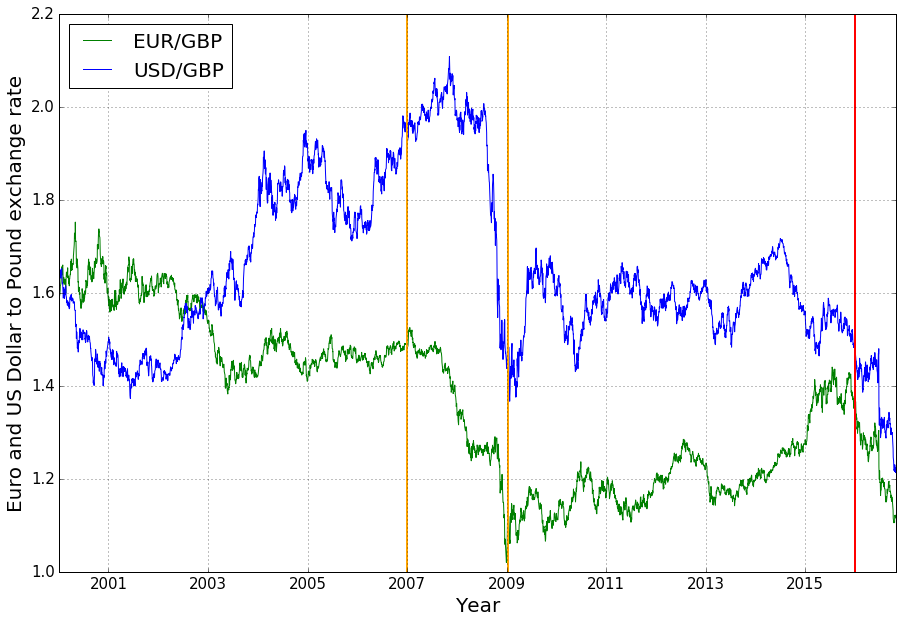

In [154]:
# daily rates
plot_ex(daily_data['datetime'], daily_data['XUDLERS'], daily_data['XUDLUSS'], 'EUR/GBP', 'USD/GBP',(1.0, 2.2), True)

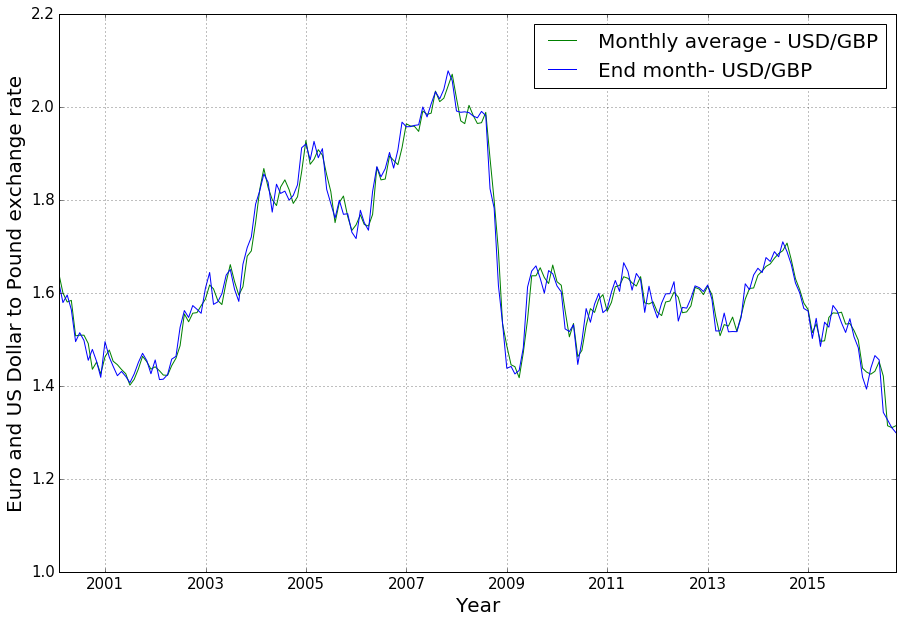

In [155]:
# comparison of monthly average with end of month
plot_ex(monthly_data['datetime'], monthly_data['XUMAUSS'], monthly_data['XUMLUSS'], 'Monthly average - USD/GBP', 'End month- USD/GBP',(1.0, 2.2), False)

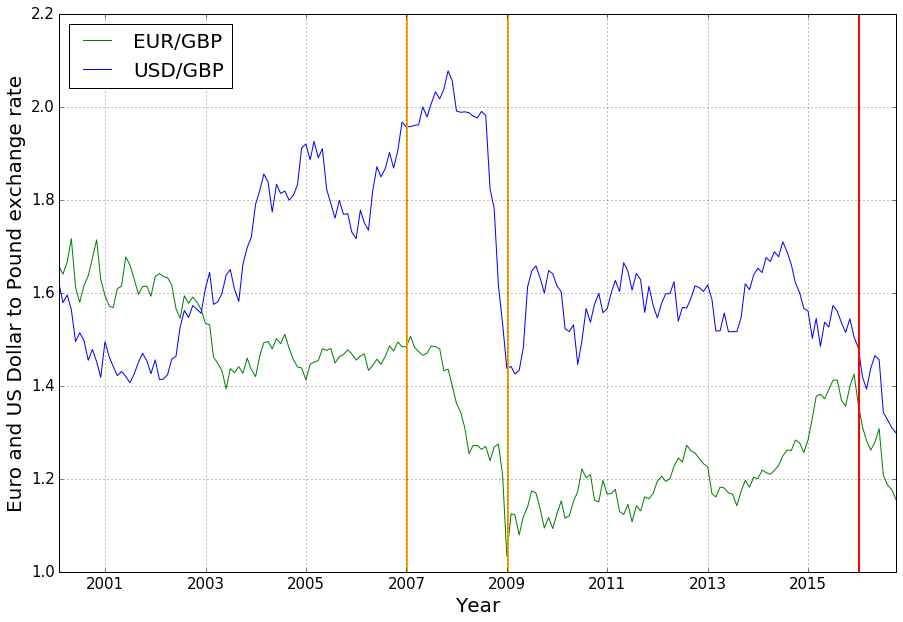

In [163]:
# monthly end month 
plot_ex(monthly_data['datetime'], monthly_data['XUMLERS'], monthly_data['XUMLUSS'], 'EUR/GBP', 'USD/GBP', (1.0, 2.2), True)

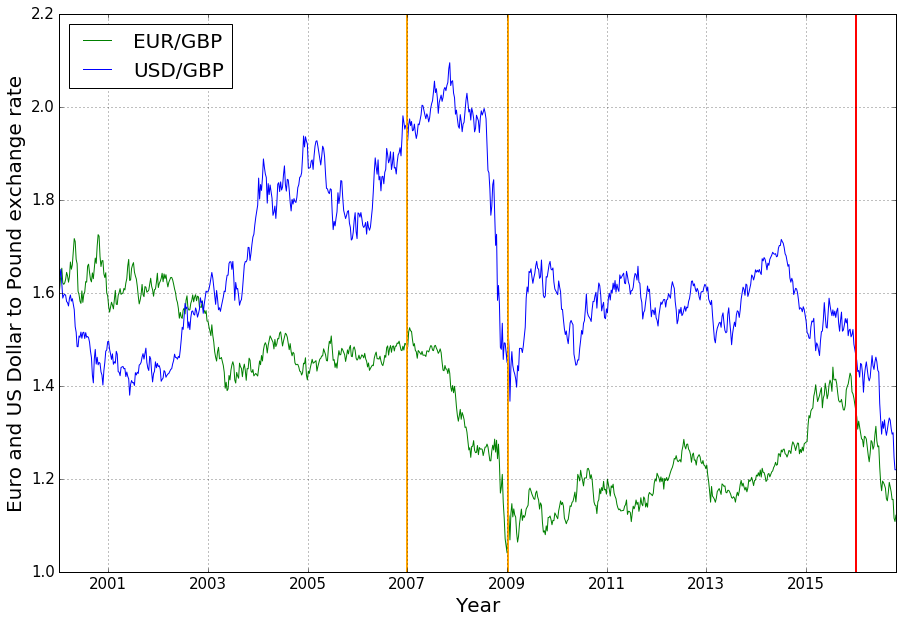

In [162]:
# weekly rates
plot_ex(weekly_data['datetime'], weekly_data['XUDLERS'], weekly_data['XUDLUSS'], 'EUR/GBP', 'USD/GBP',(1.0, 2.2), True)

## Brexit window

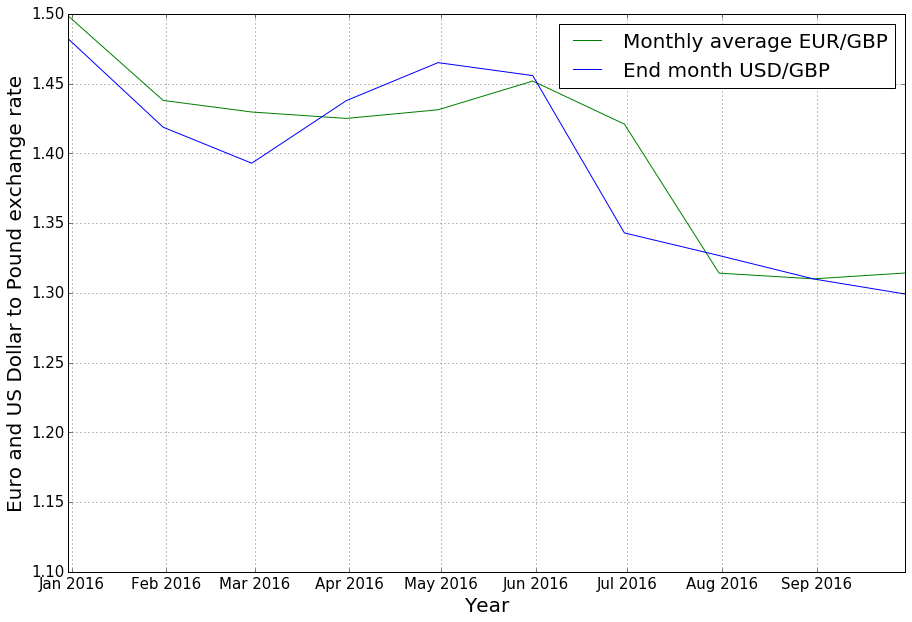

In [185]:
# comparison of weekly average vs end month 
brexit = monthly_data['datetime'].apply(lambda row: row.year > 2015 or (row.month == 12 and row.year == 2015))
brexit_times = monthly_data['datetime'][brexit]
plot_ex(brexit_times, monthly_data['XUMAUSS'][brexit], monthly_data['XUMLUSS'][brexit], 'Monthly average EUR/GBP', 'End month USD/GBP', (1.1, 1.5), False)

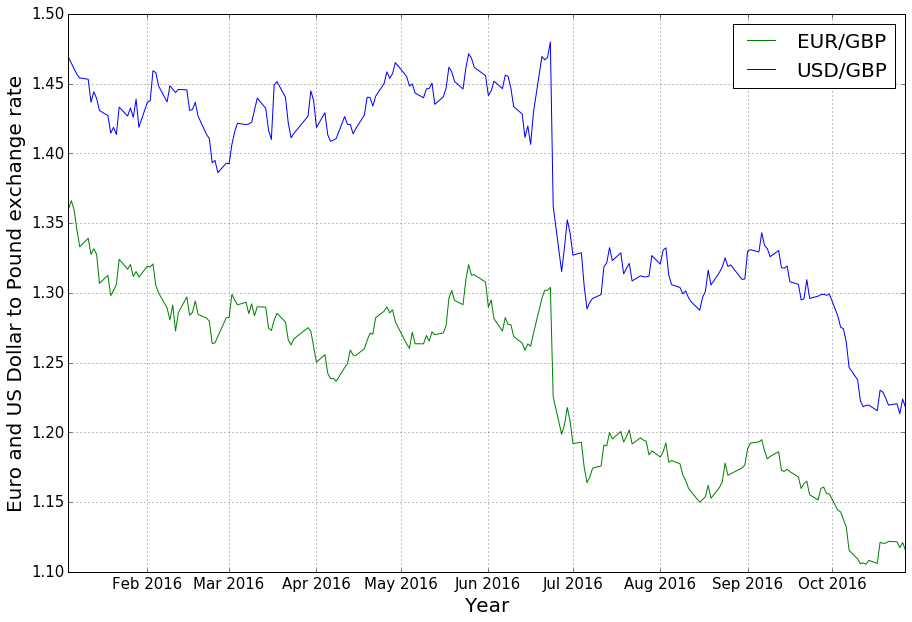

In [164]:
# brexit daily rates
brexit = daily_data['datetime'].apply(lambda row: row.year > 2015)
brexit_times = daily_data['datetime'][brexit]
plot_ex(brexit_times, daily_data['XUDLERS'][brexit], daily_data['XUDLUSS'][brexit], 'EUR/GBP', 'USD/GBP', (1.1, 1.5), False)

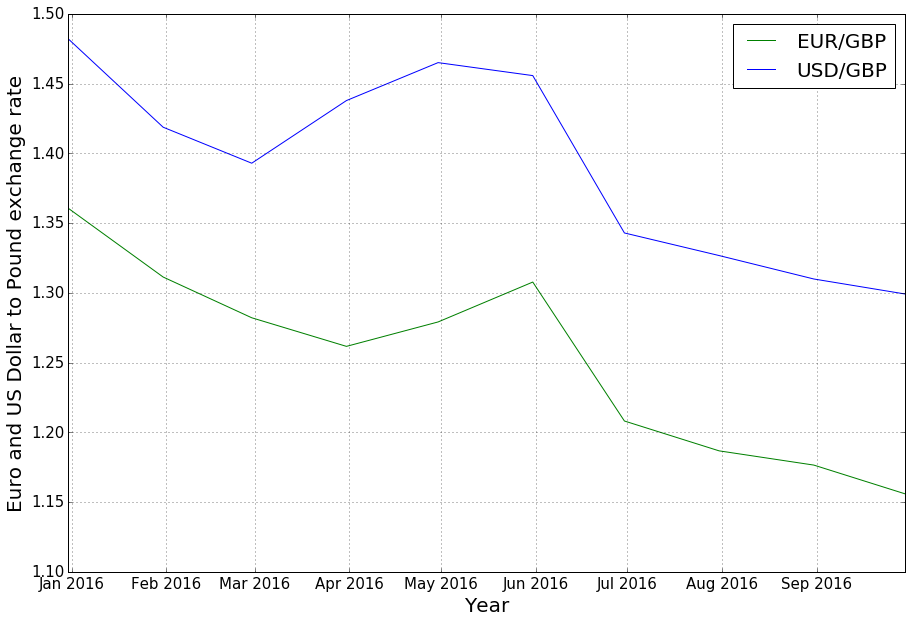

In [176]:
# brexit monthly rates
brexit = monthly_data['datetime'].apply(lambda row: row.year > 2015 or (row.month == 12 and row.year == 2015))
brexit_times = monthly_data['datetime'][brexit]
plot_ex(brexit_times, monthly_data['XUMLERS'][brexit], monthly_data['XUMLUSS'][brexit], 'EUR/GBP', 'USD/GBP',(1.1, 1.5), False)

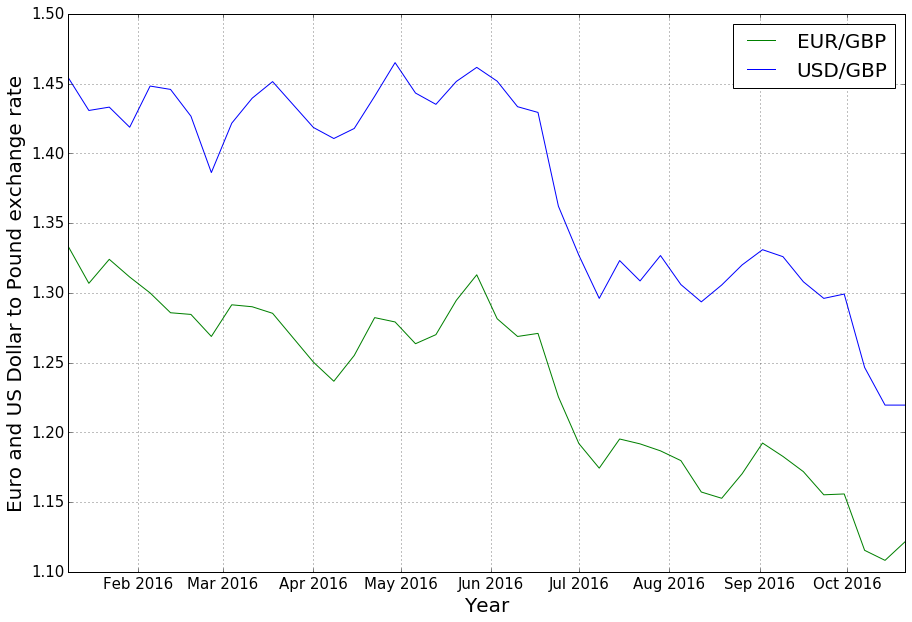

In [160]:
# brexit weekly rates
brexit = weekly_data['datetime'].apply(lambda row: row.year > 2015)
brexit_times = weekly_data['datetime'][brexit]
plot_ex(brexit_times, weekly_data['XUDLERS'][brexit], weekly_data['XUDLUSS'][brexit], 'EUR/GBP', 'USD/GBP', (1.1, 1.5), False)

## Financial Crisis Window:

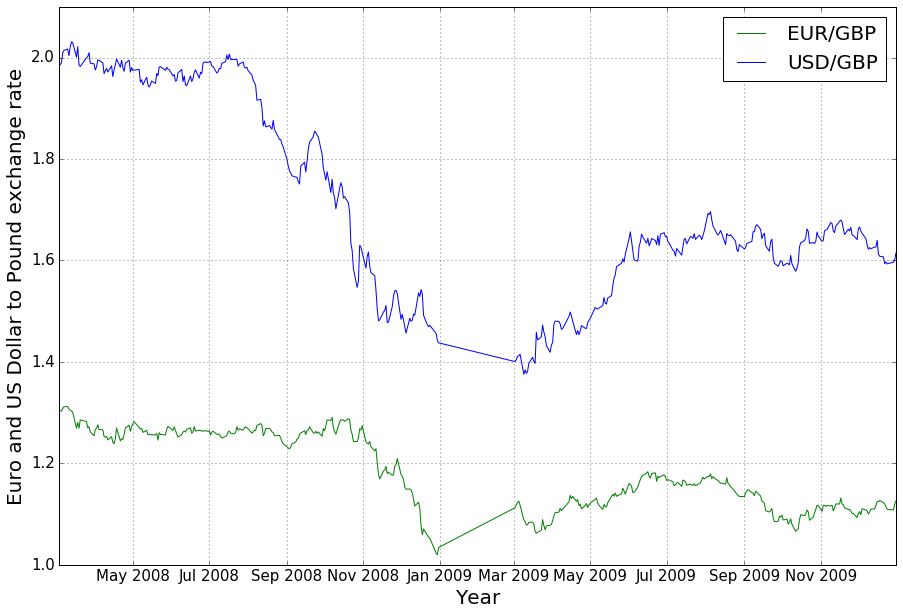

In [180]:
# financial daily data
crisis = daily_data['datetime'].apply(lambda row: (row.year > 2007 and row.month > 2) and (row.year < 2010))
crisis_times = daily_data['datetime'][crisis]      
plot_ex(crisis_times, daily_data['XUDLERS'][crisis], daily_data['XUDLUSS'][crisis], 'EUR/GBP', 'USD/GBP', (1.0, 2.1), False)

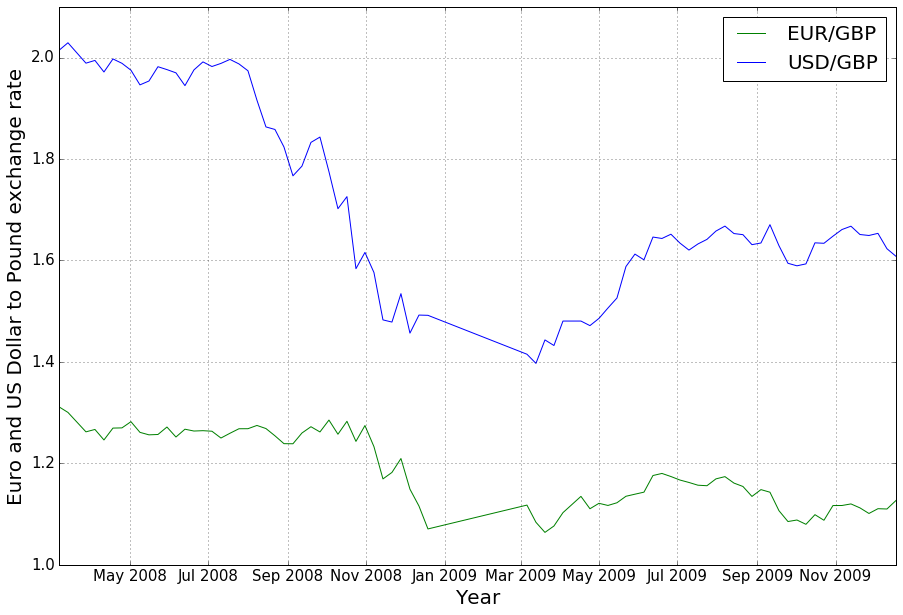

In [182]:
# financial weekly data
crisis = weekly_data['datetime'].apply(lambda row: (row.year > 2007 and row.month > 2) and (row.year < 2010))
crisis_times = weekly_data['datetime'][crisis]      
plot_ex(crisis_times, weekly_data['XUDLERS'][crisis], weekly_data['XUDLUSS'][crisis], 'EUR/GBP', 'USD/GBP', (1.0, 2.1), False)

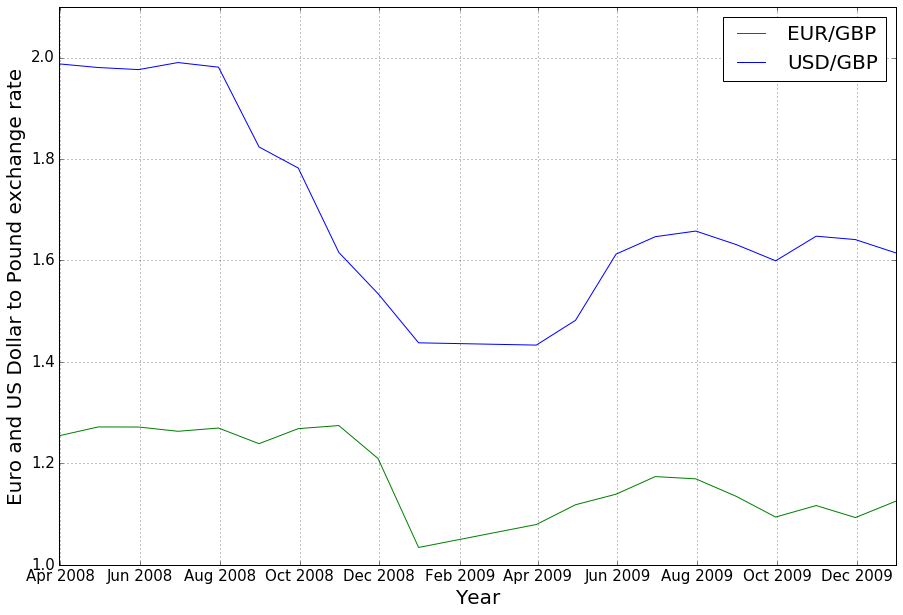

In [178]:
# financial monthly data
crisis = monthly_data['datetime'].apply(lambda row: (row.year > 2007 and row.month > 2) and (row.year < 2010))
crisis_times = monthly_data['datetime'][crisis]      
plot_ex(crisis_times, monthly_data['XUMLERS'][crisis], monthly_data['XUMLUSS'][crisis], 'EUR/GBP', 'USD/GBP', (1.0, 2.1), False)